<a href="https://colab.research.google.com/github/mahekbagde/ML/blob/main/Pract2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical - 2
Aim:
Implementation of Unsupervised Learning Algorithms from Scratch

# Problem Definition :
Download an unlabeled dataset (.csv) and implement the different unsupervised learning algorithms (k-means. Also, implement reinforcement learning. Understand the methodologies, implementation details, and libraries of each of the learning algorithms. Compare the performance of each algorithm for the given dataset.

# 1. K-Means Clustering

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
# Load the Iris dataset as an example
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels (not used for clustering)


In [3]:
# Data preprocessing (scaling the features)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of K values to test
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

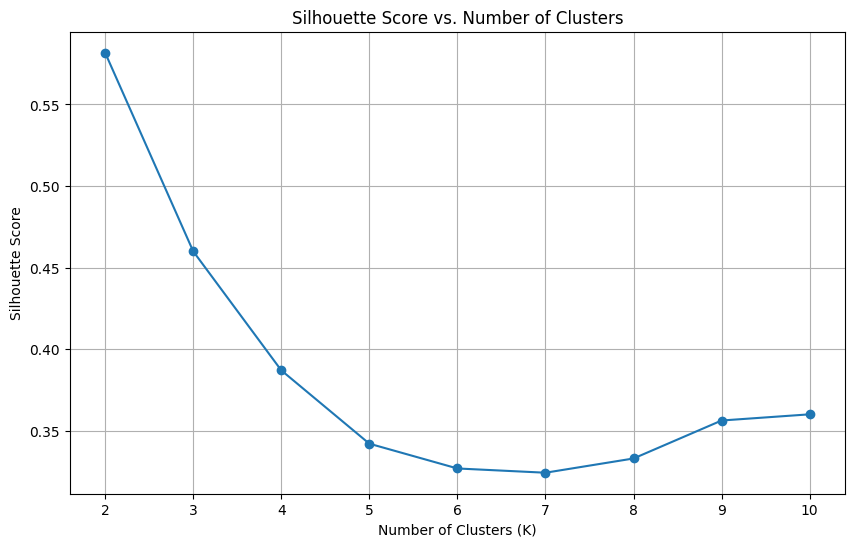

In [5]:
# Plot the silhouette scores to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()
# Based on the plot, choosing an appropriate K (e.g., K=3)

In [6]:
optimal_k = 3  # Choose the optimal K from the plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

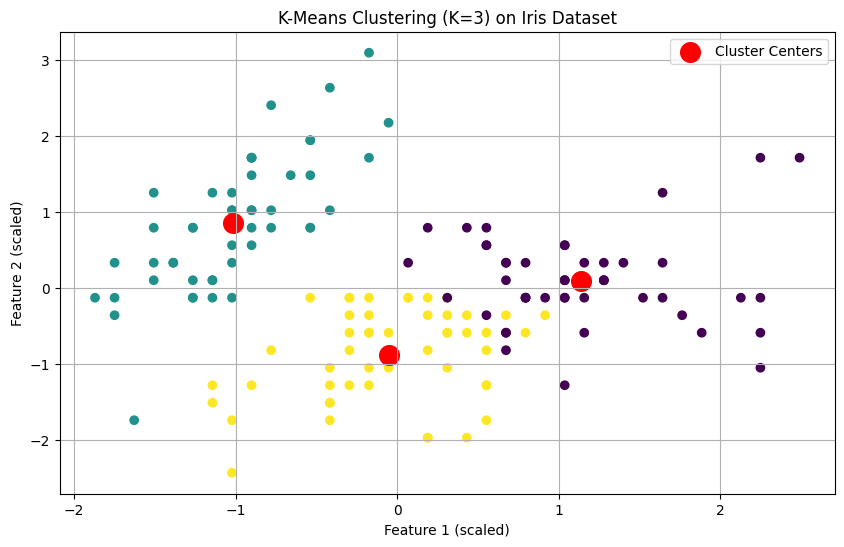

In [7]:
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters (for simplicity, use the first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title("K-Means Clustering (K=3) on Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Evaluate the clustering (optional)
from sklearn.metrics import completeness_score, homogeneity_score

completeness = completeness_score(y, cluster_assignments)
homogeneity = homogeneity_score(y, cluster_assignments)

print("Completeness Score:", completeness)
print("Homogeneity Score:", homogeneity)

Completeness Score: 0.6598476779627759
Homogeneity Score: 0.6591265018049008


# 2. Reinforcement Learning (ϵ (epsilon)-greedy algorithm)

In [9]:
#  import the necessary libraries and modules required
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [10]:
#  this code sets up the initial parameters for a multi-armed bandit problem with 10 arms and a 10-element array of random values for the reward probabilities of each arm.
n = 10
arms = np.random.rand(n)
eps = 0.1 #probability of exploration action

In [11]:
# This function simulates a scenario where a reward is given based on a certain probability, and the function returns the number of times the reward was given out of 10 attempts.
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [12]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value

In [13]:
#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

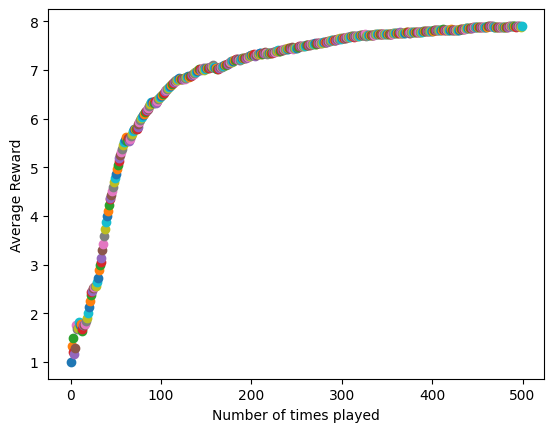

In [14]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
    if random.random() > eps: #greedy exploitation action
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)